## Observations and Insights 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
combined_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [123]:
# Checking the number of mice.
#mouse_metadata["Mouse ID"].value_counts() 
#study_results["Mouse ID"].value_counts() 
combined_table["Mouse ID"].nunique() 

249

In [48]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_table[combined_table.duplicated(keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [49]:
# Optional: Get all the data for the duplicate mouse ID. 



In [129]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_table=combined_table[combined_table['Mouse ID'] != 'g989']
combined_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [130]:
# Checking the number of mice in the clean DataFrame.
combined_table["Mouse ID"].nunique() 

248

## Summary Statistics

In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary = pd.DataFrame(combined_table.groupby("Drug Regimen").count())

#Use groupby to create summary stats by drug regime, add results into columns in summarystats

summary["Mean"] = pd.DataFrame(combined_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary["Median"] = pd.DataFrame(combined_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary["Standard Deviation"] = pd.DataFrame(combined_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary["Variance"] = pd.DataFrame(combined_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary["SEM"] = pd.DataFrame(combined_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean up columns, just keeping a count column for some of the graphs below
summary = summary[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
summary = summary.rename(columns = {"Mouse ID" : "Trials"})


In [160]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
each_drug_stat = combined_table.groupby('Drug Regimen').agg(\
        # Get the mean \
        mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median \
        median=('Tumor Volume (mm3)', np.median),\
        # Get the variance \
        var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation \
        stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) \
        Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# Display the Summary statistics table grouped by 'Drug Regimen' column
each_drug_stat



,mean,median,var,stdev,Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

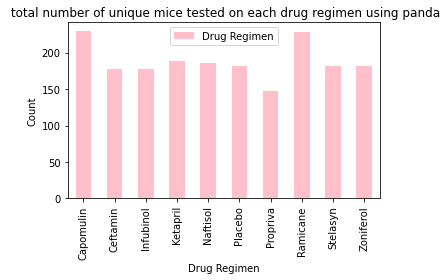

In [161]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_group = combined_table.groupby('Drug Regimen')

# Create a dataframe counting the number of data points for each Drug Regimen
group_count = pd.DataFrame(drug_group['Drug Regimen'].count())


# Create a bar chart based off of the group series from before and label the title
bar_chart = group_count.plot(kind='bar', title=" total number of unique mice tested on each drug regimen using panda", color="pink")

# Set the xlabel and ylabel using class methods
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Count")
plt.tight_layout()
# Save the figure
#plt.savefig("Desktop/PandaBarChart.png")

plt.show()


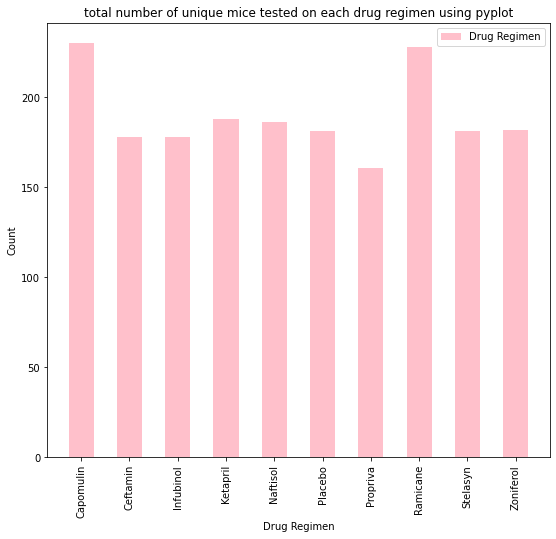

In [163]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(drug_group_count))
tick = [value for value in x_axis]

 # list indicating  x labels and set figure size to adjust for space
plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='pink', align="center", width = 0.52)
plt.xticks(tick, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("total number of unique mice tested on each drug regimen using pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

# Save the figure
#plt.savefig("Desktop/PyplotBarChart.png")
plt.show()

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# dataframe
gender_group = combined_table.groupby('Sex')

# df counting the number of data points for each gender
gender_count = pd.DataFrame(gender_group['Sex'].count())

# View the groupby dataframe
gender_count.head()


,Sex
Sex,
Female,935
Male,958


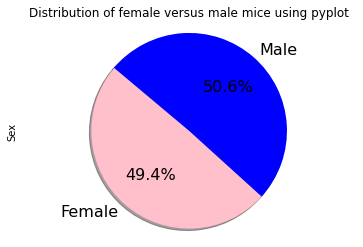

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice using pyplot",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["pink","blue"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
#plt.savefig("Desktop/PandaPieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [152]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = combined_table.groupby('Mouse ID').max()['Timepoint']
max_timepoint=max_timepoint.reset_index()
print(max_timepoint)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_volume = pd.merge(combined_table,max_timepoint, on=["Mouse ID","Timepoint"], how="right")
merged_volume

    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [157]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_list=[]

for drug in drug_list:


# Create empty list to fill with tumor vol data (for plotting)
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

  
    

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes=merged_volume.loc[merged_volume['Drug Regimen']==drug,'Tumor Volume (mm3)']


   
    
    # add subset 
    tumor_vol_list.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    lower_outliers=tumor_volumes.loc[tumor_volumes< lower_bound]
    upper_outliers=tumor_volumes.loc[tumor_volumes> upper_bound]





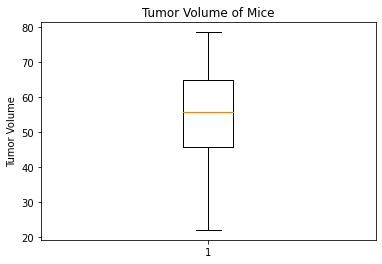

In [154]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_Volume = merged_volume['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

## Line and Scatter Plots

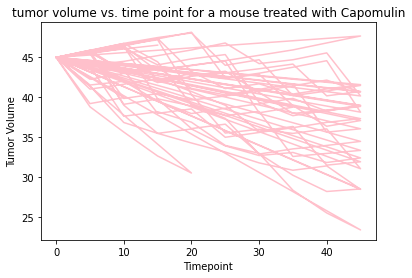

In [117]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Create a dataframe 
capomulin_drug = combined_table.loc[combined_table['Drug Regimen'] == 'Capomulin']

# View the dataframe
capomulin_drug.head()

timepoint = capomulin_drug["Timepoint"]
tumor_volume = capomulin_drug["Tumor Volume (mm3)"]

tumor_volume_line, = plt.plot(timepoint, tumor_volume,color='pink')

# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('tumor volume vs. time point for a mouse treated with Capomulin')
plt.show()

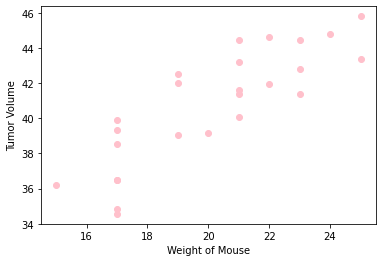

In [115]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = capomulin_drug.groupby(capomulin_drug["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin_drug.groupby(capomulin_drug["Mouse ID"])["Tumor Volume (mm3)"].mean()


plt.scatter(mouse_weight,tumor_volume,color='pink')
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


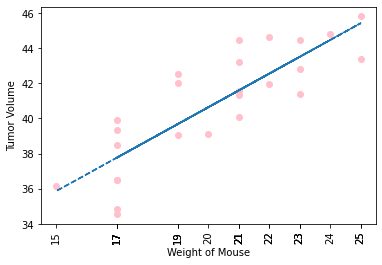

The correlation between weight and tumor value is 0.84


In [122]:
#Variables
mouse_weight = capomulin_drug.groupby(capomulin_drug["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin_drug.groupby(capomulin_drug["Mouse ID"])["Tumor Volume (mm3)"].mean()

#linear regression model 
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
fit = slope * mouse_weight + int

#plot
plt.scatter(mouse_weight,tumor_volume,color='pink')
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {correlation}')